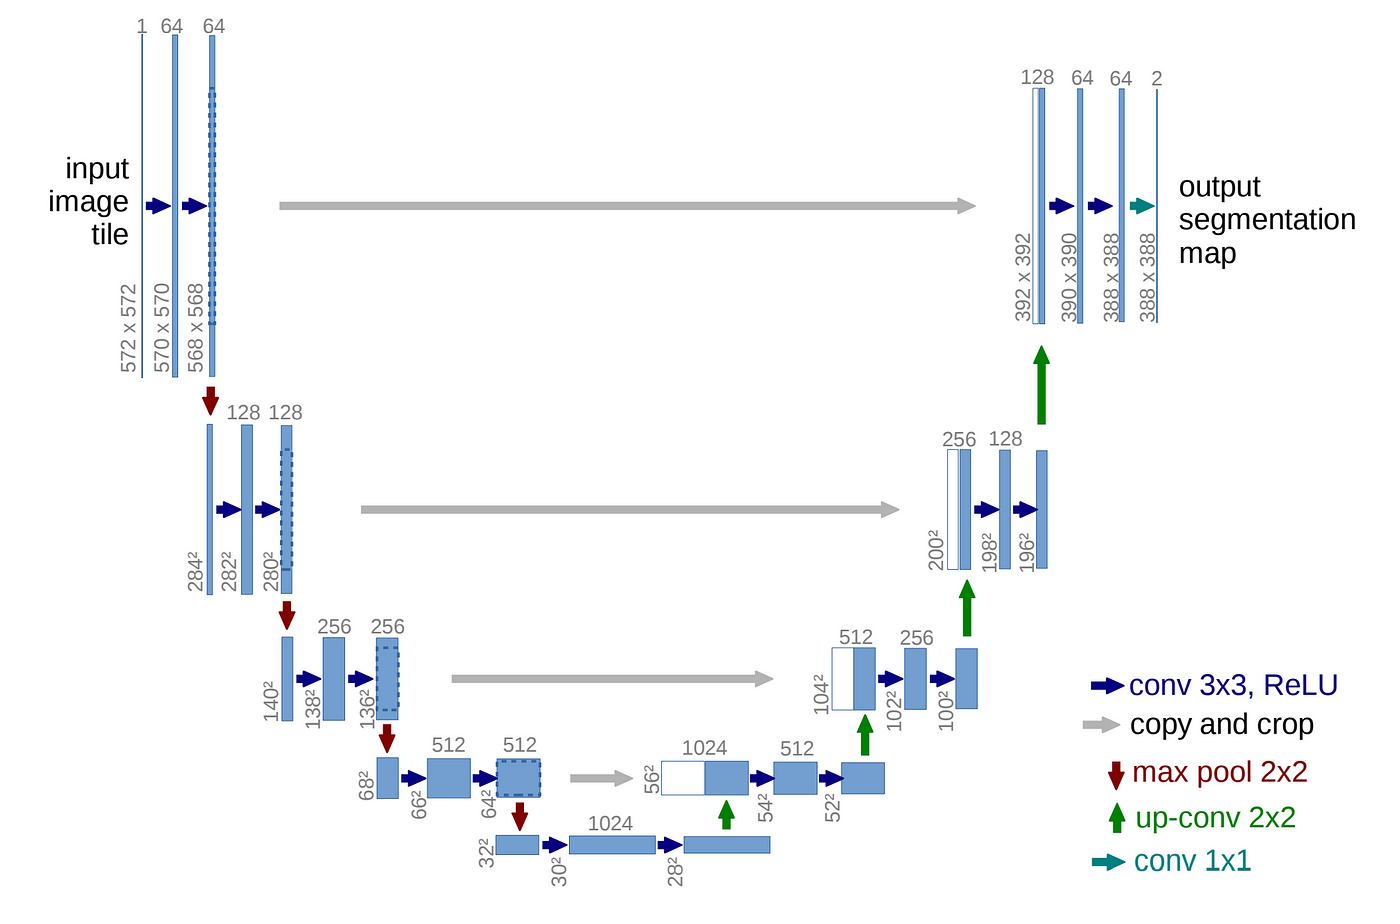

In [1]:
import numpy as np
import torch
import torch.nn as nn

In [2]:
class UNet(nn.Module):
    def __init__(self) -> None:
        super(UNet, self).__init__()
        def CBR2d(in_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=True):
            layers = []
            layers.append(nn.Conv2d(in_channels=in_channels, out_channels=out_channels,
                                 kernel_size=kernel_size, stride=stride, padding=padding,
                                 bias=bias))
            layers.append(nn.BatchNorm2d(num_features=out_channels))
            layers.append(nn.ReLU())
            return nn.Sequential(*layers)

        self.encoder1_1 = CBR2d(in_channels=1, out_channels=64)
        self.encoder1_2 = CBR2d(in_channels=64, out_channels=64)
        self.down_sampler1 = nn.MaxPool2d(kernel_size=2)
        
        self.encoder2_1 = CBR2d(in_channels=64, out_channels=128)
        self.encoder2_2 = CBR2d(in_channels=128, out_channels=128)
        self.down_sampler2 = nn.MaxPool2d(kernel_size=2)
        
        self.encoder3_1 = CBR2d(in_channels=128, out_channels=256)
        self.encoder3_2 = CBR2d(in_channels=256, out_channels=256)
        self.down_sampler3 = nn.MaxPool2d(kernel_size=2)
        
        self.encoder4_1 = CBR2d(in_channels=256, out_channels=512)
        self.encoder4_2 = CBR2d(in_channels=512, out_channels=512)
        self.down_sampler4 = nn.MaxPool2d(kernel_size=2)
        
        self.encoder5_1 = CBR2d(in_channels=512, out_channels=1024)
        self.decoder5_1 = CBR2d(in_channels=1024, out_channels=512)
        self.up_sampler4 = nn.ConvTranspose2d(in_channels=512, out_channels=512, kernel_size=2, stride=2, padding=0, bias=True)
        
        self.decoder4_1 = CBR2d(in_channels=1024, out_channels=512)
        self.decoder4_2 = CBR2d(in_channels=512, out_channels=256)
        self.up_sampler3 = nn.ConvTranspose2d(in_channels=256, out_channels=256, kernel_size=2, stride=2, padding=0, bias=True)

        self.decoder3_1 = CBR2d(in_channels=512, out_channels=256)
        self.decoder3_2 = CBR2d(in_channels=256, out_channels=128)
        self.up_sampler2 = nn.ConvTranspose2d(in_channels=128, out_channels=128, kernel_size=2, stride=2, padding=0, bias=True)
        
        self.decoder2_1 = CBR2d(in_channels=256, out_channels=128)
        self.decoder2_2 = CBR2d(in_channels=128, out_channels=64)
        self.up_sampler1 = nn.ConvTranspose2d(in_channels=64, out_channels=128, kernel_size=2, stride=2, padding=0, bias=True)

        self.decoder1_1 = CBR2d(in_channels=128, out_channels=64)
        self.decoder1_2 = CBR2d(in_channels=64, out_channels=64)

        self.fc = nn.Conv2d(in_channels=64, out_channels=1, kernel_size=1, stride=1, padding=0, bias=True)
    def forward(self, x):
        enc1_1 = self.encoder1_1(x)
        enc1_2 = self.encoder1_2(enc1_1)
        pool1 = self.down_sampler1(enc1_2)
        
        enc2_1 = self.encoder2_1(pool1)
        enc2_2 = self.encoder2_2(enc2_1)
        pool2 = self.down_sampler2(enc2_2)
        
        enc3_1 = self.encoder3_1(pool2)
        enc3_2 = self.encoder3_2(enc3_1)
        pool3 = self.down_sampler3(enc3_2)
        
        enc4_1 = self.encoder4_1(pool3)
        enc4_2 = self.encoder4_2(enc4_1)
        pool4 = self.down_sampler4(enc4_2)

        enc5 = self.encoder5_1(pool4)

        dec5 = self.decoder5_1(enc5)

        unpool4 = self.up_sampler4(dec5)
        cat4 = torch.cat((unpool4, enc4_2), dim=1)
        dec4_1 = self.decoder4_1(cat4)
        dec4_2 = self.decoder4_2(dec4_1)
        
        unpool3 = self.up_sampler3(dec4_2)
        cat3 = torch.cat((unpool3, enc3_2), dim=1)
        dec3_1 = self.decoder4_1(cat3)
        dec3_2 = self.decoder4_2(dec3_1)
        
        unpool2 = self.up_sampler2(dec3_2)
        cat2 = torch.cat((unpool2, enc2_2), dim=1)
        dec2_1 = self.decoder4_1(cat2)
        dec2_2 = self.decoder4_2(dec2_1)
        
        unpool1 = self.up_sampler4(dec2_2)
        cat1 = torch.cat((unpool1, enc1_2), dim=1)
        dec1_1 = self.decoder4_1(cat1)
        dec1_2 = self.decoder4_2(dec1_1)

        x = self.fc(dec1_2)
        return x

In [4]:
unet = UNet()
unet

UNet(
  (encoder1_1): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (encoder1_2): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (down_sampler1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (encoder2_1): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (encoder2_2): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (down_sampler2): MaxPool2d(kernel_size=2, stri